Q1. What is the mathematical formula for a linear SVM?

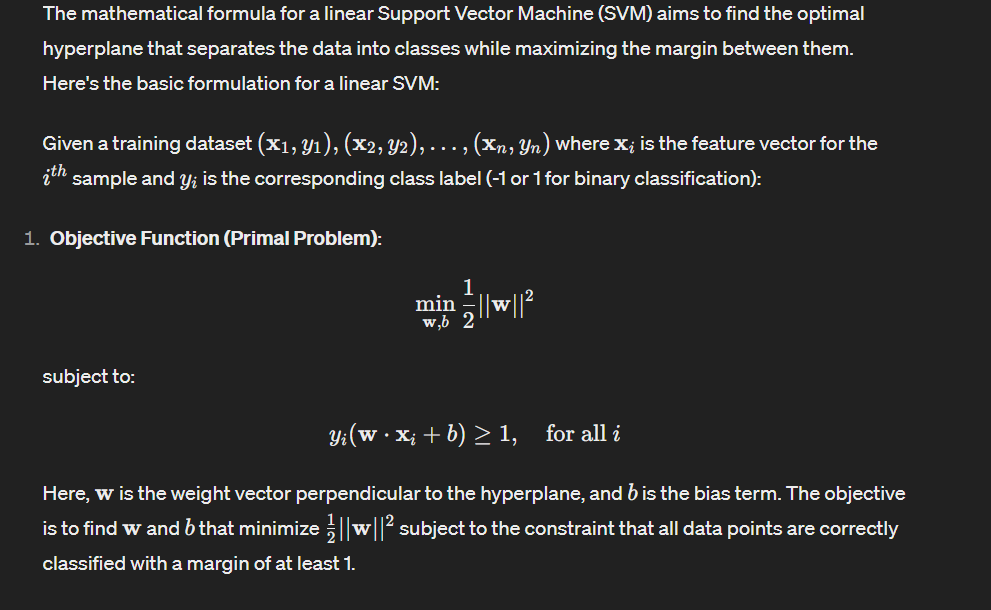
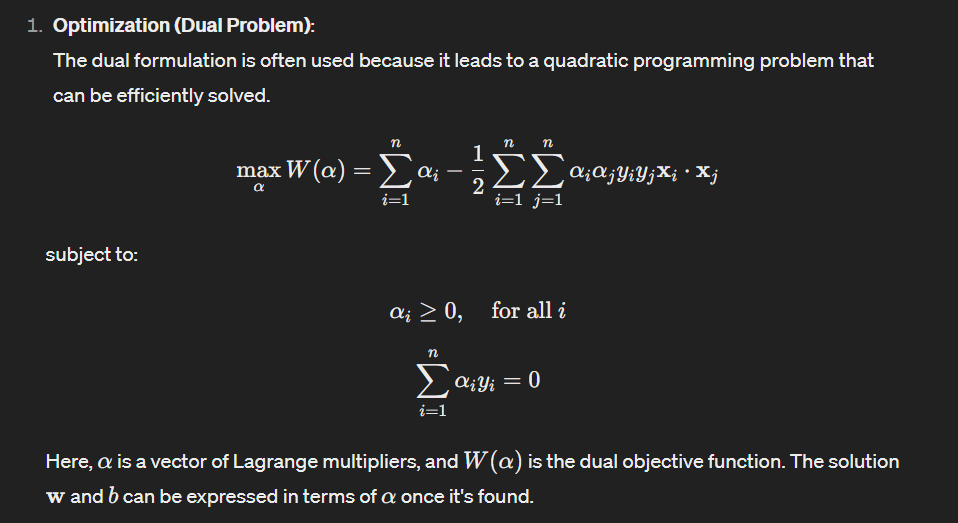
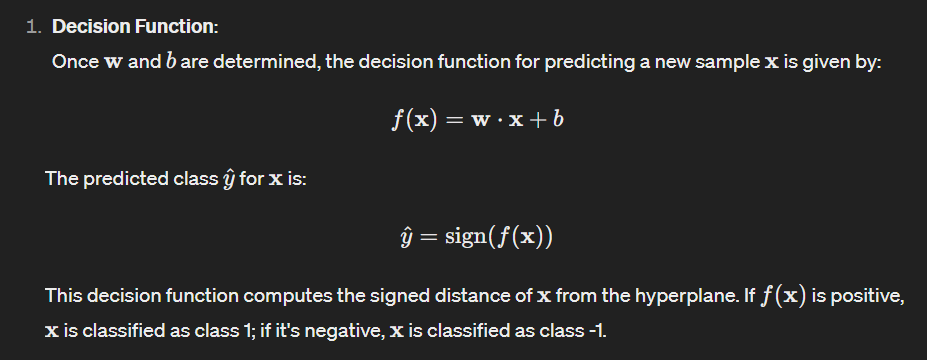

Q2. What is the objective function of a linear SVM?

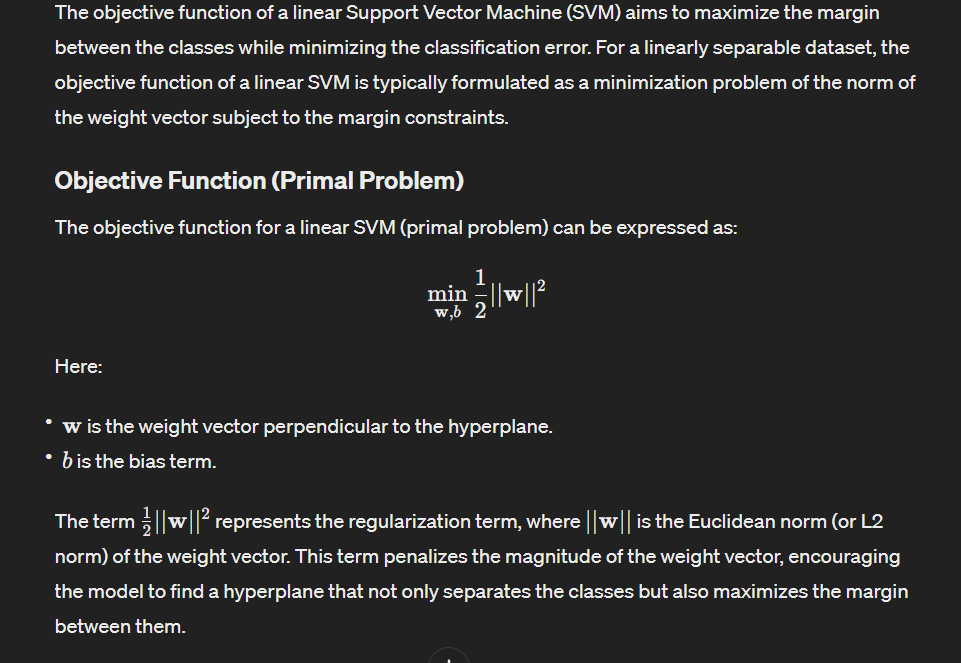
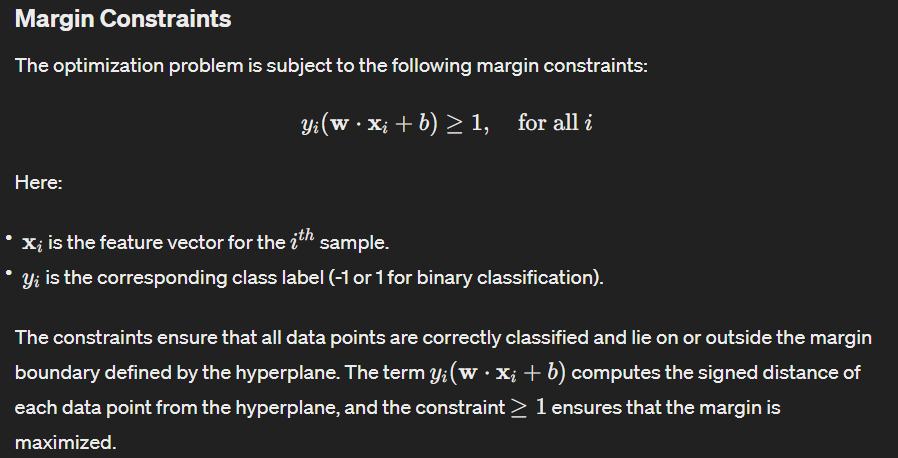

Q3. What is the kernel trick in SVM?

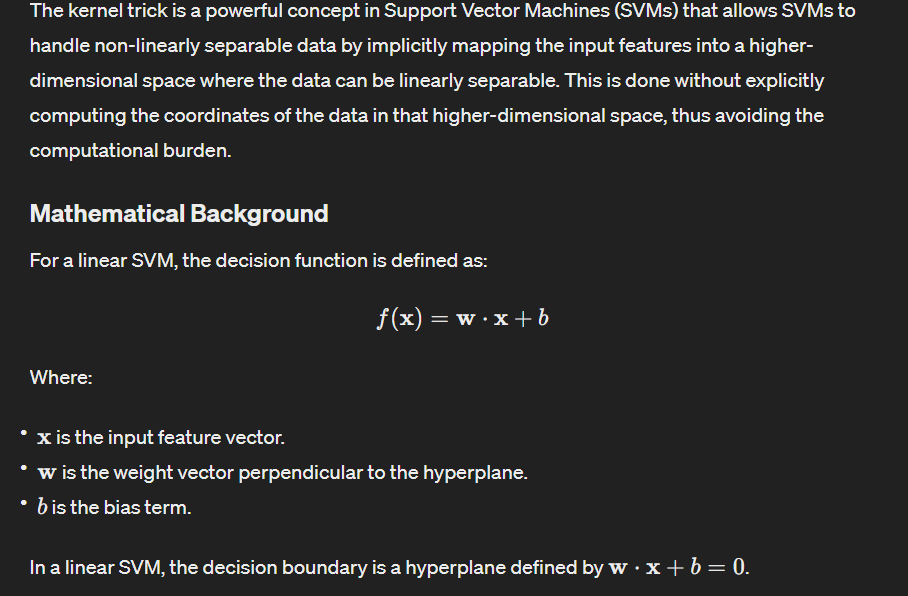
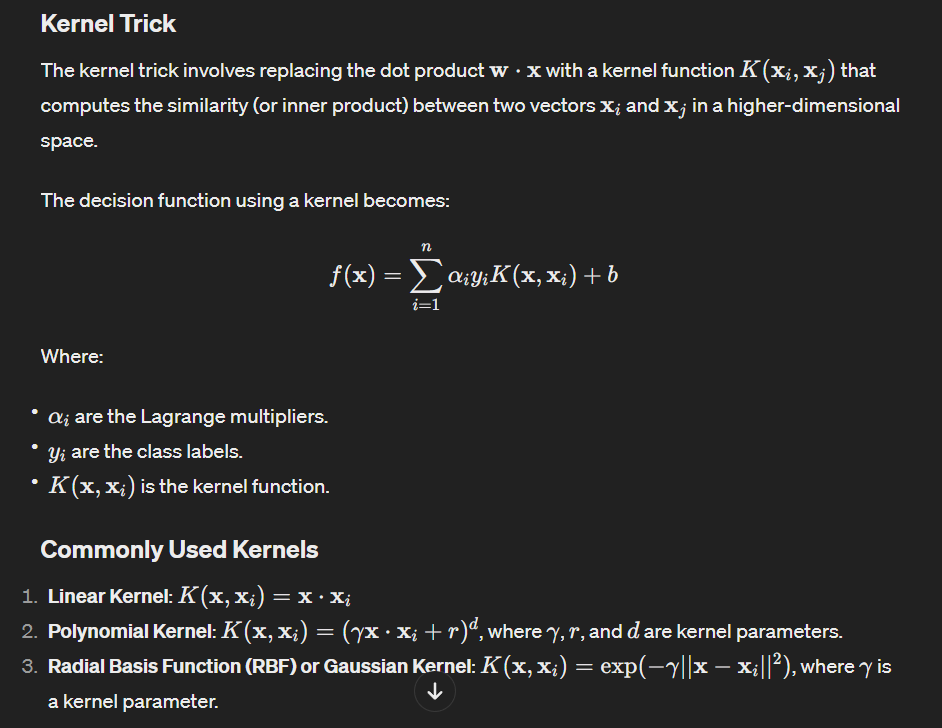
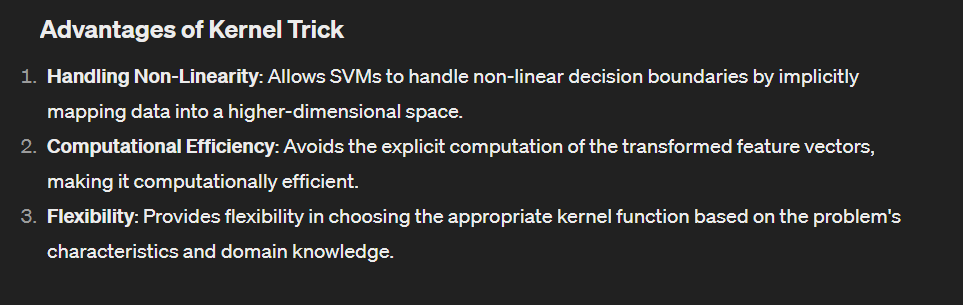

Q4. What is the role of support vectors in SVM Explain with example

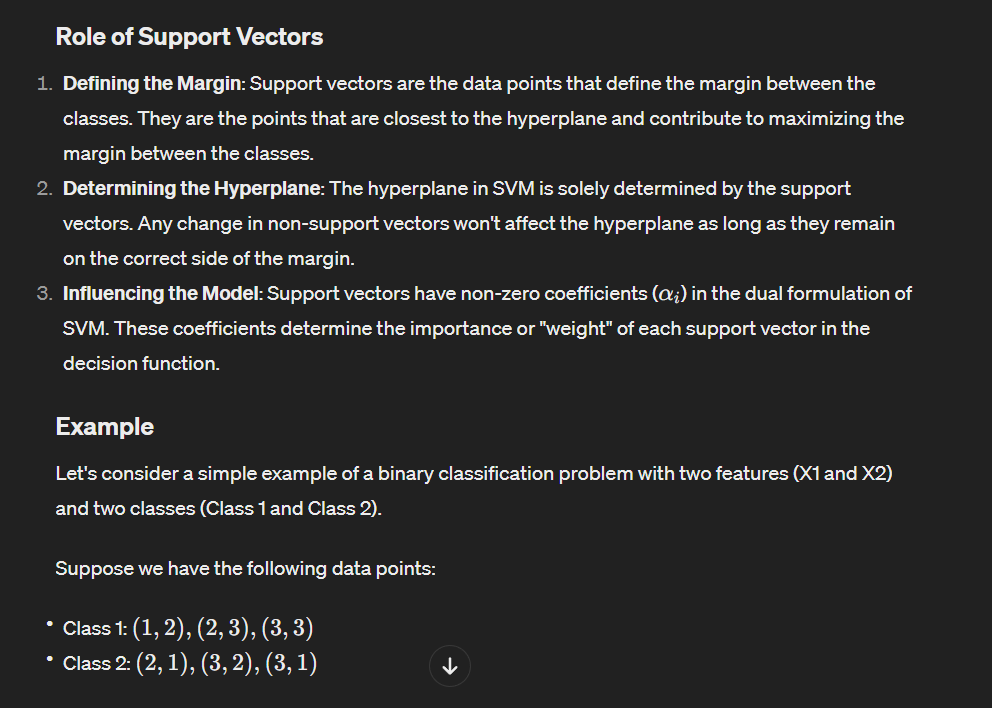
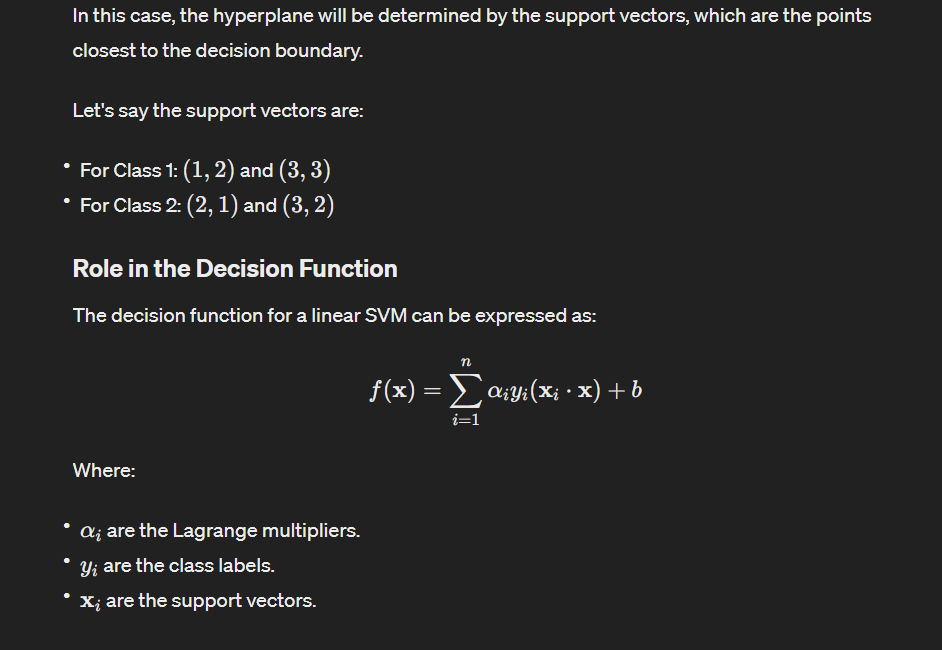
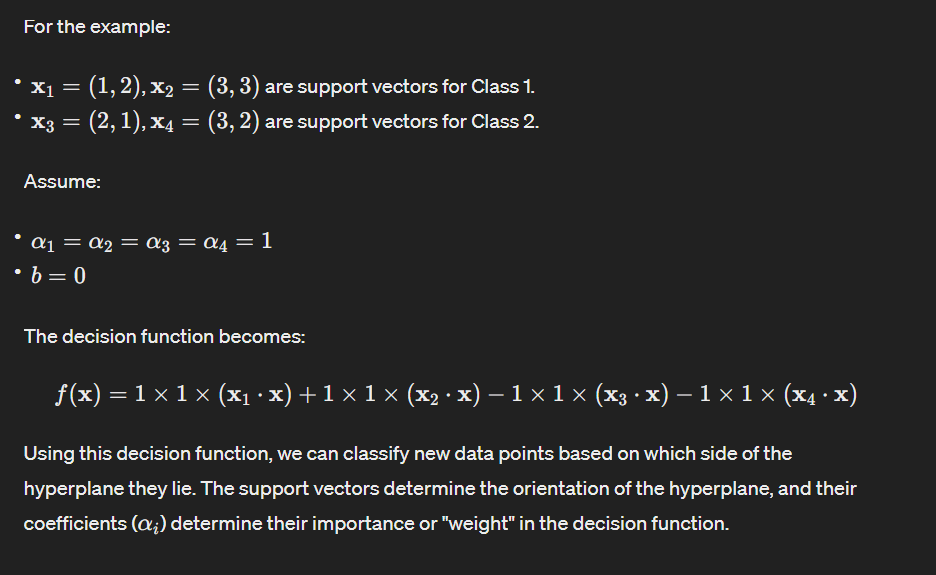

Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in
SVM?


Sure, let's illustrate the concepts of Hyperplane, Marginal plane, Soft margin, and Hard margin in SVM with examples and graphs.

1. Hyperplane
A hyperplane in SVM is a linear decision boundary that separates the data points of different classes. In a 2D feature space, the hyperplane is a line, while in a 3D feature space, it's a plane, and so on.

Example: Consider a 2D dataset with two classes (Class 1 and Class 2).

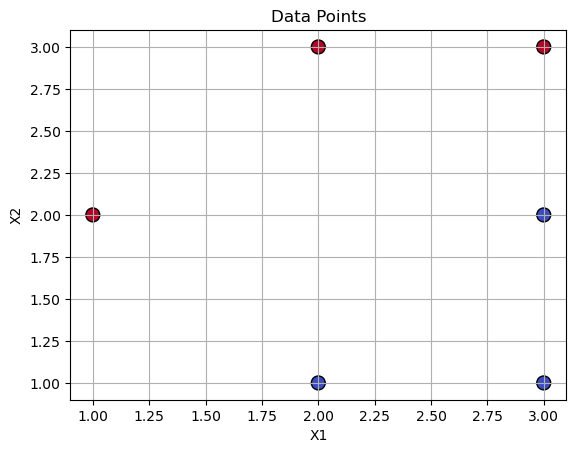

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
X = np.array([[1, 2], [2, 3], [3, 3], [2, 1], [3, 2], [3, 1]])
y = np.array([1, 1, 1, -1, -1, -1])

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=100, edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data Points')
plt.grid(True)
plt.show()


2. Marginal plane
The marginal plane is defined by the support vectors and lies parallel to the hyperplane but at a distance of 1 from it. It bounds the margin within which no data points lie, ensuring the maximum margin between the classes.

Example: Let's visualize the hyperplane and marginal planes.

/tmp/ipykernel_4179/3394214664.py:3: RuntimeWarning: divide by zero encountered in long_scalars
  slope = -w[0] / w[1]
/tmp/ipykernel_4179/3394214664.py:4: RuntimeWarning: invalid value encountered in long_scalars
  intercept = -b / w[1]


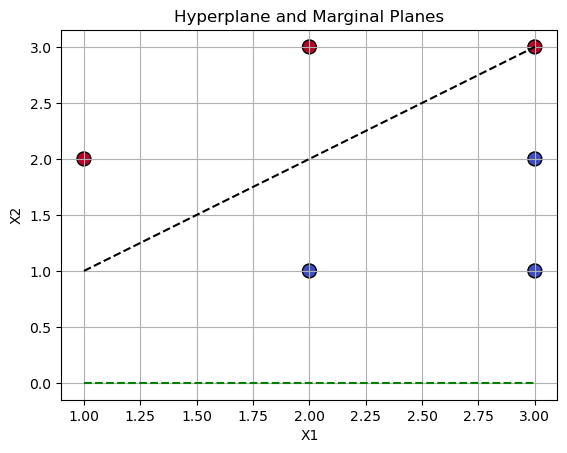

In [7]:
# Define a hyperplane (in this case, a line)
def plot_hyperplane(w, b, color='k'):
    slope = -w[0] / w[1]
    intercept = -b / w[1]
    x = np.linspace(1, 3, 100)
    y = slope * x + intercept
    plt.plot(x, y, color, linestyle='--')

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=100, edgecolors='k')

# Define and plot the hyperplane
w = np.array([1, -1])  # Example weight vector
b = 0  # Example bias term
plot_hyperplane(w, b, 'k')

# Define and plot the marginal planes
w_m1 = w + [1, 1]  # Parallel to the hyperplane and at a distance of 1
w_m2 = w - [1, 1]  # Parallel to the hyperplane and at a distance of 1
plot_hyperplane(w_m1, b, 'g')
plot_hyperplane(w_m2, b, 'g')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Hyperplane and Marginal Planes')
plt.grid(True)
plt.show()


3. Hard Margin
In a Hard Margin SVM, the goal is to find a hyperplane that perfectly separates the data points of different classes with the maximum margin, without allowing any margin violations.

Example: Let's visualize a Hard Margin SVM.

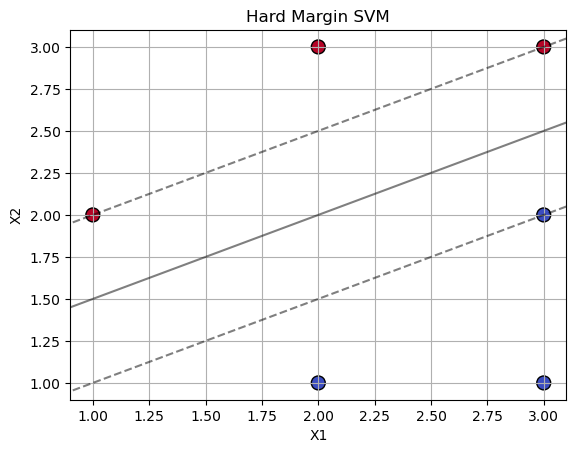

In [8]:
from sklearn.svm import SVC

# Fit a Hard Margin SVM
clf_hard = SVC(kernel='linear', C=1e5)
clf_hard.fit(X, y)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=100, edgecolors='k')

# Plot the decision boundary and margins
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf_hard.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Hard Margin SVM')
plt.grid(True)
plt.show()


4. Soft Margin
In a Soft Margin SVM, some margin violations are allowed to achieve a better generalization when the data is not perfectly separable. The parameter 
�
C controls the trade-off between maximizing the margin and minimizing the classification error.

Example: Let's visualize a Soft Margin SVM.

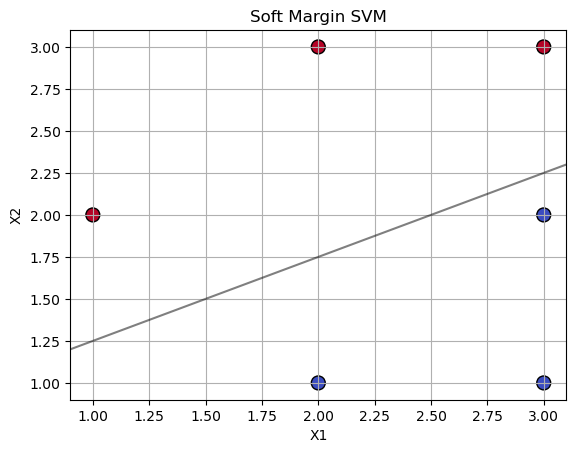

In [9]:
# Fit a Soft Margin SVM
clf_soft = SVC(kernel='linear', C=0.1)
clf_soft.fit(X, y)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=100, edgecolors='k')

# Plot the decision boundary and margins
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
Z = clf_soft.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Soft Margin SVM')
plt.grid(True)
plt.show()


Q6. SVM Implementation through Iris dataset.

Bonus task: Implement a linear SVM classifier from scratch using Python and compare its
performance with the scikit-learn implementation.
* Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
* Train a linear SVM classifier on the training set and predict the labels for the testing setl
* Compute the accuracy of the model on the testing setl
* Plot the decision boundaries of the trained model using two of the featuresl
* Try different values

In [10]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # We'll use only two features for visualization
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train a linear SVM classifier
clf_sklearn = SVC(kernel='linear')
clf_sklearn.fit(X_train, y_train)

# Predict labels for the testing set
y_pred = clf_sklearn.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of scikit-learn SVM classifier: {accuracy:.4f}')


Accuracy of scikit-learn SVM classifier: 0.9000


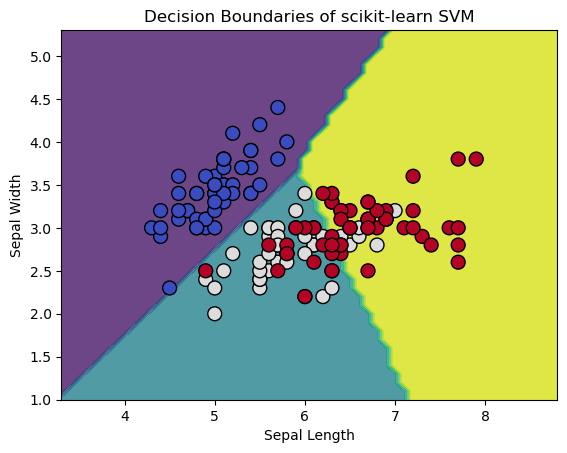

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Create a meshgrid for plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Plot decision boundaries
Z = clf_sklearn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm', s=100)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Decision Boundaries of scikit-learn SVM')
plt.show()


In [13]:
class LinearSVM:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)
        
        self.w = np.zeros(n_features)
        self.b = 0
        
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * 1/self.n_iters * self.w)
                else:
                    self.w -= self.lr * (2 * 1/self.n_iters * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

# Train the linear SVM classifier from scratch
clf_scratch = LinearSVM()
clf_scratch.fit(X_train, y_train)

# Predict labels for the testing set
y_pred_scratch = clf_scratch.predict(X_test)

# Compute accuracy
accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
print(f'Accuracy of SVM classifier from scratch: {accuracy_scratch:.4f}')


Accuracy of SVM classifier from scratch: 0.3000
